# F-test from `statsmodels`

In [ ]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

In [ ]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [ ]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

In [ ]:
df = df[vars]

In [ ]:
df = df.dropna()

In [ ]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [ ]:
mod = sm.OLS(y, X)

In [ ]:
res = mod.fit()   

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.07e-05
Time:                        13:57:44   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [ ]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [ ]:
res.rsquared

0.337950869192882

In [ ]:
sm.stats.linear_rainbow(res)

(0.8472339976156916, 0.6997965543621643)

eval_env: 1


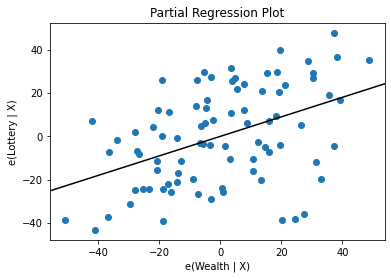

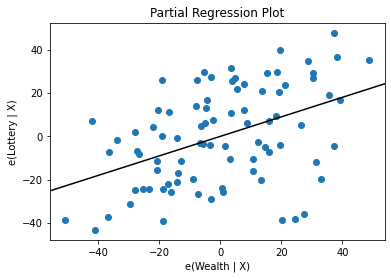

In [ ]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],data=df, obs_labels=False)

In [ ]:
import numpy as np

nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
# dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

beta = [1.0, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [ ]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     742.8
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           5.90e-39
Time:                        14:17:29   Log-Likelihood:                -61.371
No. Observations:                  50   AIC:                             130.7
Df Residuals:                      46   BIC:                             138.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0246      0.056     18.257      0.0

In [ ]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=106.97514996282989, p=5.02287884829427e-18, df_denom=46, df_num=2>
